In [45]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
feature_path="../Data02-different_descriptors/Cor_descriptor/"
TC_path="../Data02-different_descriptors/Cor_descriptor/"
train_data="Cor_train.pkl"
test_data="Cor_test.pkl"
TC_train="TC_Cortrain.pkl"
TC_test="TC_Cortest.pkl"

In [47]:
train_df=pd.read_pickle(feature_path+train_data)
test_df=pd.read_pickle(feature_path+test_data)
TCtrain_df=pd.read_pickle(TC_path+TC_train)
TCtest_df=pd.read_pickle(TC_path+TC_test)

In [50]:
TCtrain_df

0       1.663058
1       1.028773
2       0.890706
3       0.644507
4       1.255864
          ...   
1630    3.700127
1631    3.889441
1632    0.914971
1633    1.105168
1634    1.476272
Name: Kavg_log2, Length: 1635, dtype: float64

In [52]:
X_train=train_df
X_test=test_df
y_train=TCtrain_df
y_test=TCtest_df
for i in [X_train, X_test, y_train,y_test]:
    i.index = range(i.shape[0])
scaler.fit(X_train)
#scaler.fit(X_test)
X = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
X_cov = (X.T @ X) / (X.shape[0] - 1) #here we are taking our mean as 0 

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tqdm import trange

In [55]:
import scipy
for i in trange(100):
    #P_values, P = np.linalg.eig(X_cov)
    P_values, P =scipy.linalg.eig(X_cov)
    time.sleep(0.5)

100%|██████████| 100/100 [00:50<00:00,  1.97it/s]


In [56]:
P_values=P_values.real
P=P.real

In [57]:
import numpy as np
idx = np.argsort(P_values, axis=0)[::-1]
cumsum = np.cumsum(P_values[idx]) / np.sum(P_values[idx])
cumsum

array([0.33127456, 0.48588979, 0.58797775, 0.6463347 , 0.7005502 ,
       0.74414318, 0.77635487, 0.80211549, 0.8233601 , 0.84372457,
       0.86117733, 0.8782865 , 0.89304046, 0.90681847, 0.9187334 ,
       0.9279497 , 0.93662048, 0.94452197, 0.95098188, 0.95668707,
       0.96166208, 0.9664274 , 0.97081118, 0.97492294, 0.97828342,
       0.98096056, 0.98354074, 0.98576796, 0.98770758, 0.98963562,
       0.99128632, 0.9926339 , 0.99389335, 0.99511014, 0.99619241,
       0.99709776, 0.99782797, 0.99832514, 0.99875911, 0.99907215,
       0.99930497, 0.99950826, 0.99964613, 0.99976687, 0.99984635,
       0.99990686, 0.99996301, 0.99998217, 0.99999754, 0.99999983,
       1.        , 1.        , 1.        ])

([<matplotlib.axis.XTick at 0x135a76e45e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

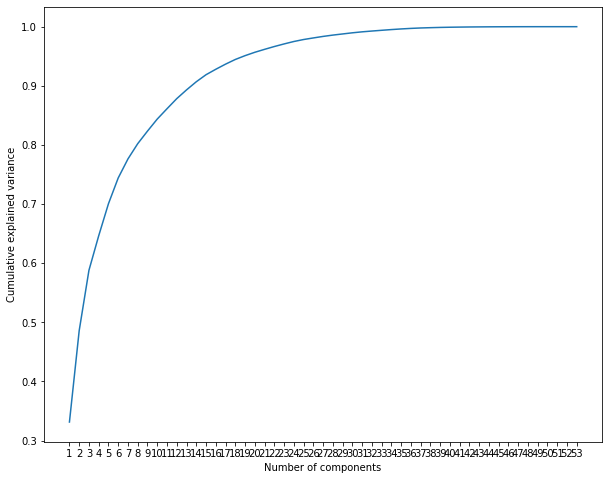

In [58]:
#cumsum = np.cumsum(P_values[idx]) / np.sum(P_values[idx])
plt.figure(figsize=(10,8))
xint = range(1, len(cumsum) + 1)
plt.plot(xint, cumsum)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)

In [59]:
c=0
for i in range(1,29):
    if cumsum[i]>0.95:
        c+=1
        print (i, cumsum[i])

18 0.9509818803068846
19 0.9566870744533761
20 0.9616620822446972
21 0.9664274030553005
22 0.9708111785587533
23 0.9749229446406664
24 0.9782834217948344
25 0.9809605568416623
26 0.9835407358044045
27 0.9857679637354111
28 0.9877075826063875


In [60]:
X_pca = X.dot(P[:,0:19])
X_pca
Xtest_pca = X_test.dot(P[:,0:19])
Xtest_pca 

array([[-1.95014974,  2.77183953,  0.16933312, ...,  0.28729057,
         0.07193301,  0.4420998 ],
       [-1.74661382,  1.92294134,  0.09025747, ..., -0.45228   ,
         0.398218  , -0.48685905],
       [ 2.07740043,  3.56410545,  1.39241641, ...,  0.43958998,
         0.08494112, -0.6001415 ],
       ...,
       [ 1.16349824, -2.72987647, -4.72177579, ..., -0.14958571,
        -1.01588123,  1.74228556],
       [ 7.19759877, -6.35869613, -0.43461808, ..., -0.89348896,
        -0.71433536,  1.33590051],
       [ 0.57772393, -1.92312077, -3.61275883, ..., -0.50619063,
        -0.41971888,  1.01605693]])

In [61]:
Xtest_pca.shape

(100, 19)

In [62]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import math
import numpy as np

In [63]:
#RF model
print ("***==========Construction of RF model==========***")
n_estimator = int(1095.6013777198768)
max_depths = int(25.0)
min_samples_split=int(np.round(3.048538443050114))
min_samples_leaf=int(np.round(1.0))
print(n_estimator,max_depths,min_samples_split,min_samples_leaf)
i=4
rfg = RandomForestRegressor(n_estimators = n_estimator, max_features='auto',random_state=i, max_depth = max_depths,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
rfg.fit(X_pca,y_train.values.ravel())
res = rfg.predict(Xtest_pca)
print("Training set score: %f" % rfg.score(X_pca,y_train))
print("Test set score: %f" % rfg.score(Xtest_pca ,y_test))
mse=mean_squared_error(y_test,res)
rmse=math.sqrt(mse)
print('MSE:{}'.format(mse))
print('RMSE:{}'.format(rmse))

***==========Construction of RF model==========***
1095 25 3 1
Training set score: 0.905390
Test set score: 0.789320
MSE:0.22611330671228722
RMSE:0.4755137292574077


In [65]:
#XGboost model
print ("***==========Construction of XGboost model==========***")
learning_rate=round(0.09341682872837534,2)
n_estimators=int(1176.387510134944)
max_depth = int(9.588862672769721)
min_child_weight=int(7.350946094169667)
subsample=round(0.317831597231615,2)
colsample_bytree=round(0.48934718175179426,2)
gamma=round(0.3661476531273544,2)
reg_alpha=round(2.518441678199748,2)
reg_lambda=round(2.478071009066136,2)
print (learning_rate,n_estimators,max_depth,min_child_weight,subsample,colsample_bytree,gamma,reg_alpha,reg_lambda)
model = xgb.XGBRegressor(learning_rate=learning_rate,n_estimators=n_estimators,max_depth=max_depth,min_child_weight=min_child_weight\
                         ,seed=7,subsample=subsample,colsample_bytree=colsample_bytree,gamma=gamma,reg_alpha=reg_alpha,reg_lambda=reg_lambda,random_state=1)
model.fit(X_pca,y_train.values.ravel())
res = model.predict(Xtest_pca)
print("Training set score: %f" % model.score(X_pca,y_train))
print("Test set score: %f" % model.score(Xtest_pca ,y_test))
mse=mean_squared_error(y_test,res)
rmse=math.sqrt(mse)
print('MSE:{}'.format(mse))
print('RMSE:{}'.format(rmse))

***==========Construction of XGboost model==========***
0.09 1176 9 7 0.32 0.49 0.37 2.52 2.48
Training set score: 0.887643
Test set score: 0.784910
MSE:0.2308466992377834
RMSE:0.48046508638795327


In [66]:
#MLP model
print ("***==========Construction of MLP model==========***")
randomseed = np.random.seed(0)
clf = MLPRegressor(solver="adam",alpha=0.8510214010857666,
                   hidden_layer_sizes=[200, 200, 200, 200], max_iter=1000,
                   verbose=False, tol=0.0001,random_state=randomseed)
clf.fit(X_pca,y_train.values.ravel())
print("Training set score: %f" % clf.score(X_pca,y_train))
print("Test set score: %f" % clf.score(Xtest_pca,y_test))
res = clf.predict(Xtest_pca)
mse=mean_squared_error(y_test,res)
rmse=math.sqrt(mse)
print('MSE:{}'.format(mse))
print('RMSE:{}'.format(rmse))

***==========Construction of MLP model==========***
Training set score: 0.870447
Test set score: 0.812371
MSE:0.20137406442881162
RMSE:0.44874721662514144


In [67]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

***==========Plots of RF model prediction results==========***


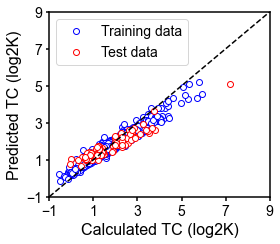

In [68]:
print ("***==========Plots of RF model prediction results==========***")
RF_train = rfg.predict(X_pca)
RF_test = rfg.predict(Xtest_pca)
plt.rc('font',family='Arial',weight='normal')
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 16,
}
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 16,
}
plt.figure(figsize=(4,3.5))
#plt.title("Traing dataset with r2=0.955",font1)
plt.plot(y_train,RF_train,color='b',marker='o',linestyle='', markerfacecolor='white',alpha=1)
plt.plot(y_test,RF_test,color='r',marker='o',linestyle='', markerfacecolor='white',alpha=1)
plt.legend(labels=["Training data","Test data"],loc="best",fontsize=14)  
sub_map= str.maketrans('0123456789', '₀₁₂₃₄₅₆₇₈₉')
title='Calculated TC (log2K)'
title1='Predicted TC (log2K)'
plt.xlabel(title,font1 )
plt.ylabel(title1,font1 )
plt.xlim((-1, 9))
plt.ylim((-1, 9))
plt.plot([-1,9],[-1,9], color='k', linewidth=1.5, linestyle='--')
my_x_ticks = np.arange(-1,10,2)
my_y_ticks = np.arange(-1,10,2)
plt.xticks(my_x_ticks,size=14)
plt.yticks(my_y_ticks,size=14)
plt.tick_params(width=1.5)
bwith = 1.5 
TK = plt.gca()
TK.spines['bottom'].set_linewidth(bwith)
TK.spines['left'].set_linewidth(bwith)
TK.spines['top'].set_linewidth(bwith)
TK.spines['right'].set_linewidth(bwith)
plt.tight_layout()
# show
plt.show()

***==========Plots of XGBoost model prediction results==========***


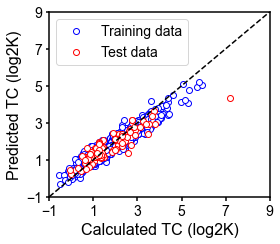

In [69]:
print ("***==========Plots of XGBoost model prediction results==========***")
XGBoost_train = model.predict(X_pca)
XGBoost_test = model.predict(Xtest_pca)
plt.rc('font',family='Arial',weight='normal')
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 16,
}
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 16,
}
plt.figure(figsize=(4,3.5))
#plt.title("Traing dataset with r2=0.955",font1)
plt.plot(y_train,XGBoost_train,color='b',marker='o',linestyle='', markerfacecolor='white',alpha=1)
plt.plot(y_test,XGBoost_test,color='r',marker='o',linestyle='', markerfacecolor='white',alpha=1)
plt.legend(labels=["Training data","Test data"],loc="best",fontsize=14)  
sub_map= str.maketrans('0123456789', '₀₁₂₃₄₅₆₇₈₉')
title='Calculated TC (log2K)'
title1='Predicted TC (log2K)'
plt.xlabel(title,font1 )
plt.ylabel(title1,font1 )
plt.xlim((-1, 9))
plt.ylim((-1, 9))
plt.plot([-1,9],[-1,9], color='k', linewidth=1.5, linestyle='--')
my_x_ticks = np.arange(-1,10,2)
my_y_ticks = np.arange(-1,10,2)
plt.xticks(my_x_ticks,size=14)
plt.yticks(my_y_ticks,size=14)
plt.tick_params(width=1.5)
bwith = 1.5 
TK = plt.gca()
TK.spines['bottom'].set_linewidth(bwith)
TK.spines['left'].set_linewidth(bwith)
TK.spines['top'].set_linewidth(bwith)
TK.spines['right'].set_linewidth(bwith)
plt.tight_layout()
# show
plt.show()

***==========Plots of MLP model prediction results==========***


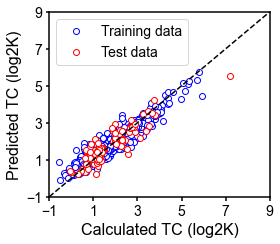

In [70]:
print ("***==========Plots of MLP model prediction results==========***")
MLP_train = clf.predict(X_pca)
MLP_test = clf.predict(Xtest_pca)
plt.rc('font',family='Arial',weight='normal')
font1 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 16,
}
font2 = {'family' : 'Arial',
'weight' : 'normal',
'size'   : 16,
}
plt.figure(figsize=(4,3.5))
#plt.title("Traing dataset with r2=0.955",font1)
plt.plot(y_train,MLP_train,color='b',marker='o',linestyle='', markerfacecolor='white',alpha=1)
plt.plot(y_test,MLP_test,color='r',marker='o',linestyle='', markerfacecolor='white',alpha=1)
plt.legend(labels=["Training data","Test data"],loc="best",fontsize=14)  
sub_map= str.maketrans('0123456789', '₀₁₂₃₄₅₆₇₈₉')
title='Calculated TC (log2K)'
title1='Predicted TC (log2K)'
plt.xlabel(title,font1 )
plt.ylabel(title1,font1 )
plt.xlim((-1, 9))
plt.ylim((-1, 9))
plt.plot([-1,9],[-1,9], color='k', linewidth=1.5, linestyle='--')
my_x_ticks = np.arange(-1,10,2)
my_y_ticks = np.arange(-1,10,2)
plt.xticks(my_x_ticks,size=14)
plt.yticks(my_y_ticks,size=14)
plt.tick_params(width=1.5)
bwith = 1.5 
TK = plt.gca()
TK.spines['bottom'].set_linewidth(bwith)
TK.spines['left'].set_linewidth(bwith)
TK.spines['top'].set_linewidth(bwith)
TK.spines['right'].set_linewidth(bwith)
plt.tight_layout()
# show
plt.show()